In [1]:
# Import Python libraries
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm

In [2]:
# Import sensor measurements
sensor_measurements = pd.read_csv('data/Sensor_measurements.csv', sep=';')

In [3]:
# Inspect the table
sensor_measurements.head(5)

sensor_name            meas_dttm  value
0     Sensor1  2012-12-26 21:05:00   0.00
1     Sensor1  2012-12-26 21:00:00   0.00
2     Sensor1  2012-12-26 20:55:00   8.52
3     Sensor1  2012-12-26 20:50:00   8.37
4     Sensor1  2012-12-26 20:45:00   8.43

In [4]:
# Group the data by sensor name and create a pivot table
sensor_measurements = sensor_measurements.groupby(['sensor_name','meas_dttm', 'value'])['sensor_name'].agg(['count']).reset_index()
sensor_measurements = sensor_measurements.pivot_table(values='value', columns='sensor_name', index='meas_dttm')

In [5]:
# Change indexing to datetime
sensor_measurements.index = pd.to_datetime(sensor_measurements.index)
sensor_measurements.index.names = ['Date']

In [6]:
# Inspect sensor measurements table
sensor_measurements.head(3)

sensor_name          Sensor1  Sensor10  Sensor11  Sensor12  Sensor13  \
Date                                                                   
2012-11-18 00:00:00    25.47      0.00     34.92  1.115172      2.79   
2012-11-18 00:05:00    25.44      0.03     37.95  1.094830      2.79   
2012-11-18 00:10:00    25.38      0.00     38.94  1.125661      2.76   

sensor_name          Sensor14   Sensor15    Sensor16  Sensor17  Sensor18  ...  \
Date                                                                      ...   
2012-11-18 00:00:00    119.61  15.882244  226.059975     -0.87     25.89  ...   
2012-11-18 00:05:00    118.74  15.826761  226.345345     -0.93     26.22  ...   
2012-11-18 00:10:00    118.95  15.709980  226.356720     -0.93     24.51  ...   

sensor_name            Sensor49      Sensor5  Sensor50  Sensor51   Sensor52  \
Date                                                                          
2012-11-18 00:00:00  131.252586  6303.644531  0.819992  2.183136  42.122395   
2012-11-18 00:05:00  131.161079  6295.443604  0.786310  2.105405  42.193577   
2012-11-18 00:10:00  131.228668  6296.026611  0.794410  2.206790  42.270833   

sensor_name             Sensor53  Sensor6  Sensor7   Sensor8  Sensor9  
Date                                                                   
2012-11-18 00:00:00  4831.876831  1523.70  4405.77  13215.27   180.42  
2012-11-18 00:05:00  4831.742798  1521.48  4395.03  13167.99   179.64  
2012-11-18 00:10:00  4831.888916  1529.91  4412.94  13262.94   180.03  

[3 rows x 53 columns]

In [7]:
# Quick summary statistics of the data
sensor_measurements.describe()

sensor_name       Sensor1      Sensor10      Sensor11      Sensor12  \
count        20449.000000  20449.000000  20449.000000  20449.000000   
mean            24.787033      1.326439     10.644155      1.262610   
std              5.069590      4.116548      8.647812      0.390892   
min              0.000000     -3.600000     -0.900000      0.000000   
25%             24.330000      0.000000      2.070000      1.091724   
50%             26.070000      0.000000      9.030000      1.326178   
75%             26.880000      0.150000     17.820000      1.476712   
max             30.600000     94.440000     89.430000      6.884417   

sensor_name      Sensor13      Sensor14      Sensor15      Sensor16  \
count        20449.000000  20449.000000  20449.000000  20449.000000   
mean             9.401918    104.317925     14.803193    211.982278   
std              8.615720     29.435489      4.099467     16.982069   
min              0.000000      0.000000      0.000000      1.170878   
25%              2.580000     92.490000     13.319352    197.129814   
50%              5.730000    109.830000     15.203456    213.960617   
75%             16.590000    123.810000     17.272116    224.824699   
max             82.740000    151.530000     82.722296    246.493332   

sensor_name      Sensor17      Sensor18  ...      Sensor49       Sensor5  \
count        20449.000000  20449.000000  ...  20449.000000  20449.000000   
mean            35.842635     22.642153  ...    132.352940   6202.380021   
std             48.884839      7.009816  ...      4.091689   1149.484732   
min             -2.040000    -30.000000  ...      0.000000      0.000000   
25%             -0.930000     21.300000  ...    129.450600   6334.279541   
50%             -0.570000     23.670000  ...    132.197823   6373.607666   
75%             74.220000     25.140000  ...    135.125805   6421.369629   
max            300.000000    106.290000  ...    150.547806   8519.548828   

sensor_name      Sensor50      Sensor51      Sensor52      Sensor53  \
count        20449.000000  20449.000000  20449.000000  20449.000000   
mean             0.877370      1.880478     40.253568   4709.052448   
std              4.240817      0.551325      4.710472    883.943323   
min              0.000000      0.000000      5.334202     -0.151235   
25%              0.545317      1.611822     37.906454   4832.142700   
50%              0.701131      1.837717     40.839460   4918.034180   
75%              1.105903      2.057239     42.951387   4925.622437   
max            584.555145      7.650484     52.094908   5021.394653   

sensor_name       Sensor6       Sensor7       Sensor8       Sensor9  
count        20449.000000  20449.000000  20449.000000  20449.000000  
mean          1372.106237   3970.012709  11910.541545    192.845518  
std            332.570626    960.790135   2882.812171     15.640939  
min             -0.660000      0.000000      0.000000     60.420000  
25%           1346.430000   3886.410000  11660.640000    192.840000  
50%           1436.340000   4149.060000  12448.920000    194.940000  
75%           1539.690000   4417.410000  13254.420000    196.590000  
max           1742.250000   5018.040000  15066.840000    367.290000  

[8 rows x 53 columns]

In [8]:
# Check for missing values
sensor_measurements.isna().sum()

sensor_name
Sensor1      1747
Sensor10     1747
Sensor11     1747
Sensor12     1747
Sensor13     1747
Sensor14     1747
Sensor15     1747
Sensor16     1747
Sensor17     1747
Sensor18     1747
Sensor19     1747
Sensor2      1747
Sensor20     1747
Sensor21     1747
Sensor22     1747
Sensor23     1747
Sensor24     1747
Sensor25     1747
Sensor26     1747
Sensor27     1747
Sensor28     1747
Sensor29     1747
Sensor3      1747
Sensor30     1747
Sensor31     1747
Sensor32     1747
Sensor33     1747
Sensor34     1747
Sensor35    20768
Sensor36    21868
Sensor37     1747
Sensor38     1747
Sensor39     1747
Sensor4      1747
Sensor40     1747
Sensor41     1747
Sensor42     1747
Sensor43     1747
Sensor44     1747
Sensor45     1747
Sensor46     1747
Sensor47     1747
Sensor48     1747
Sensor49     1747
Sensor5      1747
Sensor50     1747
Sensor51     1747
Sensor52     1747
Sensor53     1747
Sensor6      1747
Sensor7      1747
Sensor8      1747
Sensor9      1747
dtype: int64

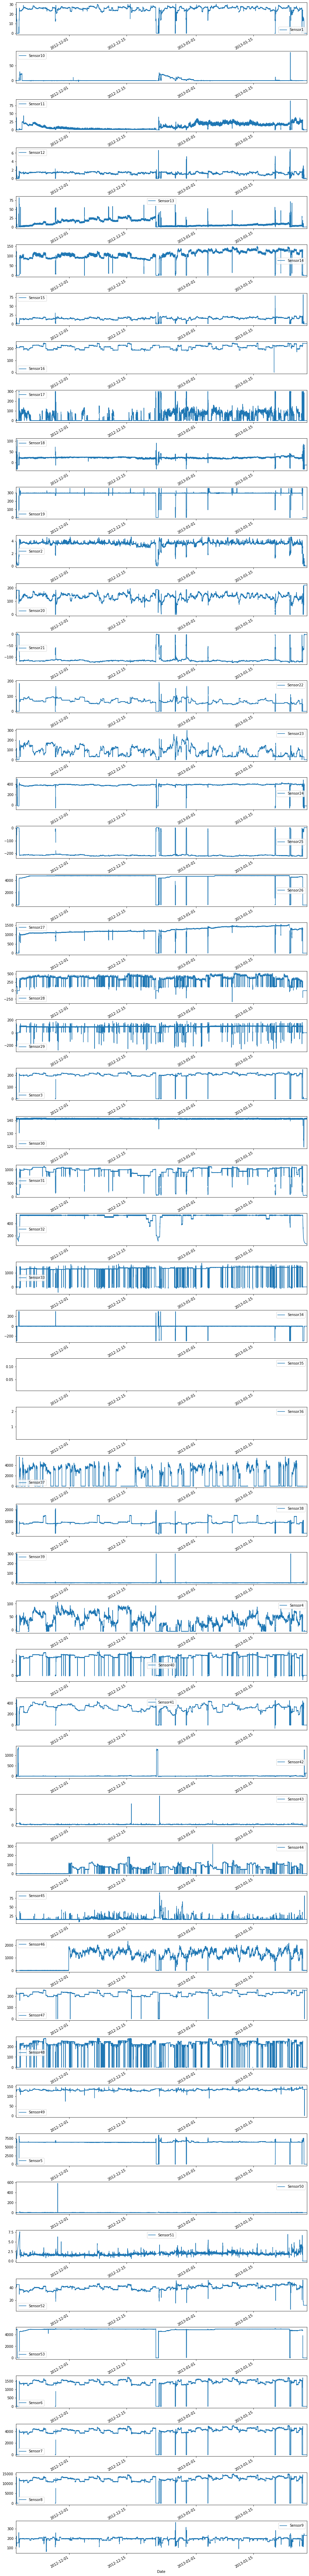

In [9]:
# Plot time series and save as pdf for later inspection
fig, ax = plt.subplots(len(sensor_measurements.columns), sharex=False)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.5)
for i in range(0, len(sensor_measurements.columns)):
    sensor_measurements.plot(y=sensor_measurements.columns[i], figsize=(15,150), ax=ax[i])
plt.savefig('plots/sensor_timeseries.pdf')

In [10]:
# Import shutdown data
shutdowns = pd.read_csv('data/Shutdowns.csv', sep=';')
shutdowns.head()

shutdown_start_dttm    shutdown_end_dttm    action
0  2013-03-21 01:54:00  2013-03-21 02:07:00  shutdown
1  2013-03-21 13:30:00  2013-03-21 13:36:00  shutdown
2  2013-03-21 21:53:00  2013-03-21 22:11:00  shutdown
3  2013-03-22 01:45:00  2013-03-22 01:58:00  shutdown
4  2013-03-22 06:22:00  2013-03-22 07:41:00  shutdown

In [11]:
# Change shutdown start and end date datatype to datetime
#shutdowns.index = pd.to_datetime(shutdowns.shutdown_start_dttm)
shutdowns["shutdown_start_dttm"] = pd.to_datetime(shutdowns["shutdown_start_dttm"])
shutdowns["shutdown_end_dttm"] = pd.to_datetime(shutdowns["shutdown_end_dttm"])

In [12]:
# Number of shutdown intervals
shutdowns.shape[0]

7906

In [13]:
# Check for missing values
shutdowns.isna().sum()

shutdown_start_dttm    0
shutdown_end_dttm      0
action                 0
dtype: int64

Text(0, 0.5, 'Frequency')

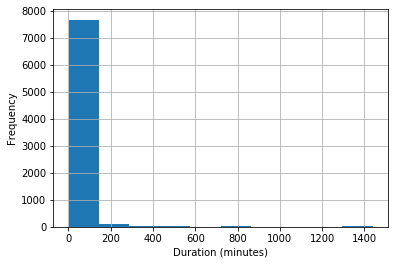

In [14]:
# Let us inspect the shutdown duration distribution
shutdown_durations = (shutdowns["shutdown_end_dttm"] - shutdowns["shutdown_start_dttm"])/ np.timedelta64(1, 'm')
shutdown_durations.hist()
plt.xlabel("Duration (minutes)")
plt.ylabel("Frequency")

In [15]:
print("{}{}{}".format("Out of ", shutdowns.shape[0], " shutdowns, the number of shutdowns less than 60 minutes:"))
print(sum(shutdown_durations < 60))

Out of 7906 shutdowns, the number of shutdowns less than 60 minutes:
7320


In [16]:
print("{}{}{}".format("Out of ", shutdowns.shape[0], " shutdowns, the number of shutdowns less than 30 minutes:"))
print(sum(shutdown_durations < 30))

Out of 7906 shutdowns, the number of shutdowns less than 30 minutes:
6531


In [17]:
print("{}{}{}".format("Out of ", shutdowns.shape[0], " shutdowns, the number of shutdowns less than 5 minutes:"))
print(sum(shutdown_durations < 5))

Out of 7906 shutdowns, the number of shutdowns less than 5 minutes:
1522


In [18]:
# Filter out shutdown intervals from sensor measurements time series
mask = ((sensor_measurements.index >= shutdowns.shutdown_start_dttm[0]) & (sensor_measurements.index <= shutdowns.shutdown_end_dttm[0])) 
for i in range(1, len(shutdowns.shutdown_start_dttm)):
    mask |= ((sensor_measurements.index >= shutdowns.shutdown_start_dttm[i]) & (sensor_measurements.index <= shutdowns.shutdown_end_dttm[i])) 
sensor_measurements.loc[mask, :] = np.nan

In [19]:
# Let us see now how many missing values are in the sensor measurements
sensor_measurements.isna().sum()

sensor_name
Sensor1      4780
Sensor10     4780
Sensor11     4780
Sensor12     4780
Sensor13     4780
Sensor14     4780
Sensor15     4780
Sensor16     4780
Sensor17     4780
Sensor18     4780
Sensor19     4780
Sensor2      4780
Sensor20     4780
Sensor21     4780
Sensor22     4780
Sensor23     4780
Sensor24     4780
Sensor25     4780
Sensor26     4780
Sensor27     4780
Sensor28     4780
Sensor29     4780
Sensor3      4780
Sensor30     4780
Sensor31     4780
Sensor32     4780
Sensor33     4780
Sensor34     4780
Sensor35    20940
Sensor36    21908
Sensor37     4780
Sensor38     4780
Sensor39     4780
Sensor4      4780
Sensor40     4780
Sensor41     4780
Sensor42     4780
Sensor43     4780
Sensor44     4780
Sensor45     4780
Sensor46     4780
Sensor47     4780
Sensor48     4780
Sensor49     4780
Sensor5      4780
Sensor50     4780
Sensor51     4780
Sensor52     4780
Sensor53     4780
Sensor6      4780
Sensor7      4780
Sensor8      4780
Sensor9      4780
dtype: int64

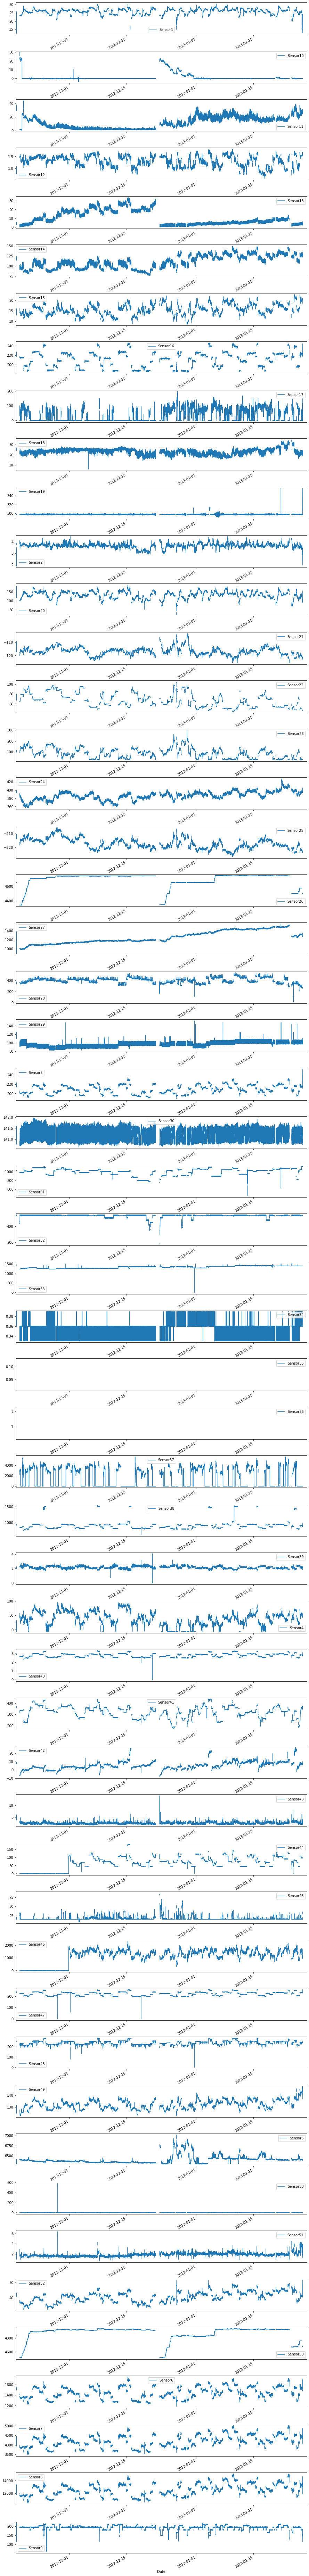

In [20]:
# Plot sensor time series with the shutdown intervals filtered out
fig, ax = plt.subplots(len(sensor_measurements.columns), sharex=False)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.5)
for i in range(0, len(sensor_measurements.columns)):
    sensor_measurements.plot(y=sensor_measurements.columns[i], figsize=(15,150), ax=ax[i])
plt.savefig('plots/sensor_timeseries_without_shutdowns.pdf')

In [21]:
# Import component changes data
component_changes = pd.read_csv('data/Component_changes.csv', sep=';')

In [22]:
# Number of rows in the data
print(component_changes.shape[0])

5


In [23]:
# Inspect component change data
component_changes.head(5)

installation_dttm     supplier  sub_machine  component_id
0  2012-10-14 00:00:00  Manufactor2         2212          1401
1  2012-11-18 00:00:00  Manufactor2         2212          1403
2  2012-12-22 00:00:00  Manufactor2         2212          1405
3  2013-01-28 00:00:00  Manufactor1         2212          1407
4  2013-03-03 00:00:00  Manufactor2         2212          1410

In [24]:
# Let us store the change_times in an array for later use
component_changes.index = pd.to_datetime(component_changes.installation_dttm)
change_times = list(component_changes.installation_dttm.values)

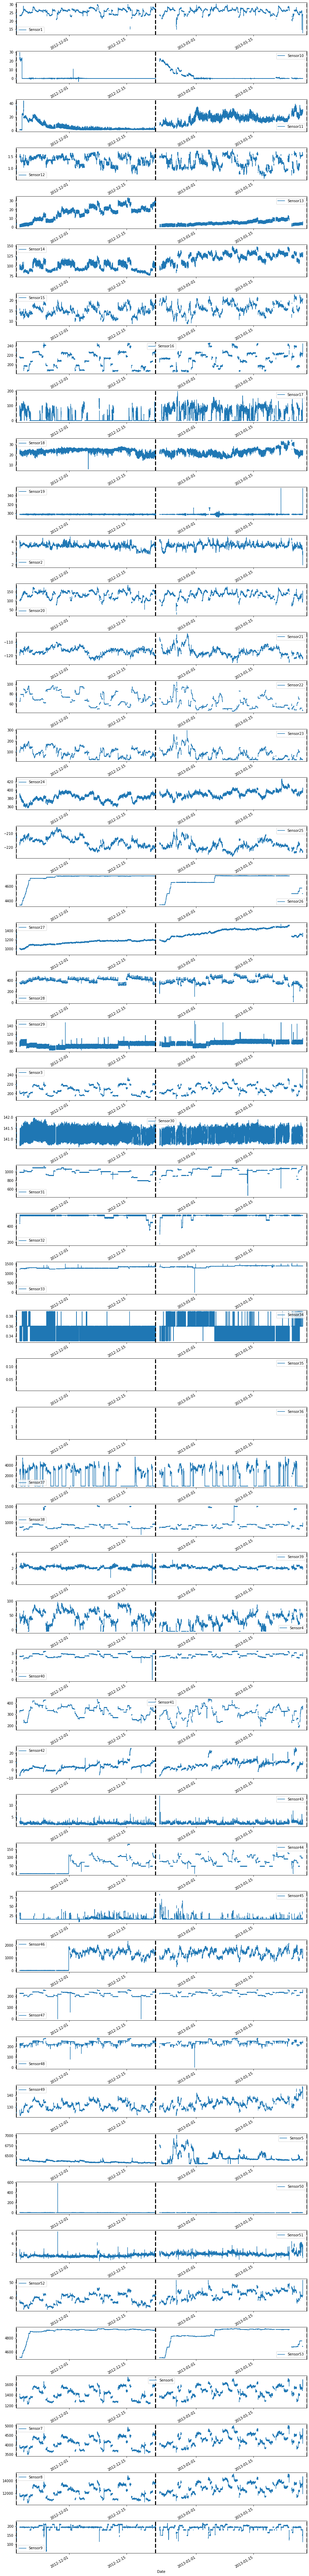

In [25]:
# Plot filtered sensor measurements and draw component change times
fig, ax = plt.subplots(len(sensor_measurements.columns), sharex=False)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.5)
for i in range(0, len(sensor_measurements.columns)):
    sensor_measurements.plot(y=sensor_measurements.columns[i], figsize=(15,150), ax=ax[i])
    
    # Draw ticked lines at the important timestamps
    hline0 = ax[i].axvline(x = change_times[0], linewidth=3, color='black',ls='--')
    hline1 = ax[i].axvline(x = change_times[1], linewidth=3, color='black',ls='--')
    hline2 = ax[i].axvline(x = change_times[2], linewidth=3, color='black',ls='--')
    hline3 = ax[i].axvline(x = change_times[3], linewidth=3, color='black',ls='--')
    hline4 = ax[i].axvline(x = change_times[4], linewidth=3, color='black',ls='--')
    
plt.savefig('plots/component_changes.pdf')

In [26]:
# Finally drop Sensors 35 and 36 since they seem to just contain missing data
del sensor_measurements['Sensor35']
del sensor_measurements['Sensor36']

In [27]:
# In the remaining sensors, deal with the missing data by simple linear extrapolation
# There are more sophisticated ways to interpolate the time series, but due to lack of time we do not experiment
# with them.
sensor_measurements = sensor_measurements.interpolate()

In [28]:
# Check that the missing values have been handled
sensor_measurements.isna().sum()

sensor_name
Sensor1     0
Sensor10    0
Sensor11    0
Sensor12    0
Sensor13    0
Sensor14    0
Sensor15    0
Sensor16    0
Sensor17    0
Sensor18    0
Sensor19    0
Sensor2     0
Sensor20    0
Sensor21    0
Sensor22    0
Sensor23    0
Sensor24    0
Sensor25    0
Sensor26    0
Sensor27    0
Sensor28    0
Sensor29    0
Sensor3     0
Sensor30    0
Sensor31    0
Sensor32    0
Sensor33    0
Sensor34    0
Sensor37    0
Sensor38    0
Sensor39    0
Sensor4     0
Sensor40    0
Sensor41    0
Sensor42    0
Sensor43    0
Sensor44    0
Sensor45    0
Sensor46    0
Sensor47    0
Sensor48    0
Sensor49    0
Sensor5     0
Sensor50    0
Sensor51    0
Sensor52    0
Sensor53    0
Sensor6     0
Sensor7     0
Sensor8     0
Sensor9     0
dtype: int64

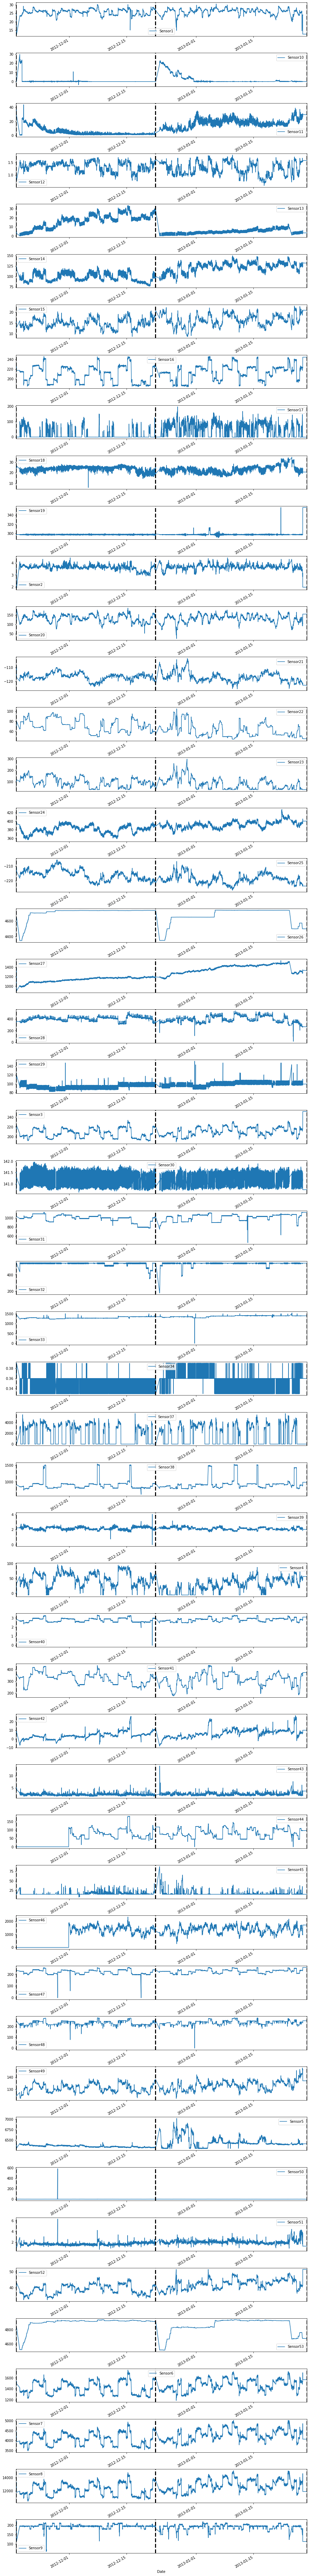

In [29]:
# Inspect the interpolated time series
fig, ax = plt.subplots(len(sensor_measurements.columns), sharex=False)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.5)
for i in range(0, len(sensor_measurements.columns)):

        sensor_measurements.plot(y=sensor_measurements.columns[i], figsize=(15,150), ax=ax[i])
    
        # Draw ticked lines at the important timestamps
        hline0 = ax[i].axvline(x = change_times[0], linewidth=3, color='black',ls='--')
        hline1 = ax[i].axvline(x = change_times[1], linewidth=3, color='black',ls='--')
        hline2 = ax[i].axvline(x = change_times[2], linewidth=3, color='black',ls='--')
        hline3 = ax[i].axvline(x = change_times[3], linewidth=3, color='black',ls='--')
        hline4 = ax[i].axvline(x = change_times[4], linewidth=3, color='black',ls='--')
    
plt.savefig('plots/component_changes_interpolated.pdf')

In [30]:
# Average the data to hourly
hourly_averages = sensor_measurements.resample('H').mean()

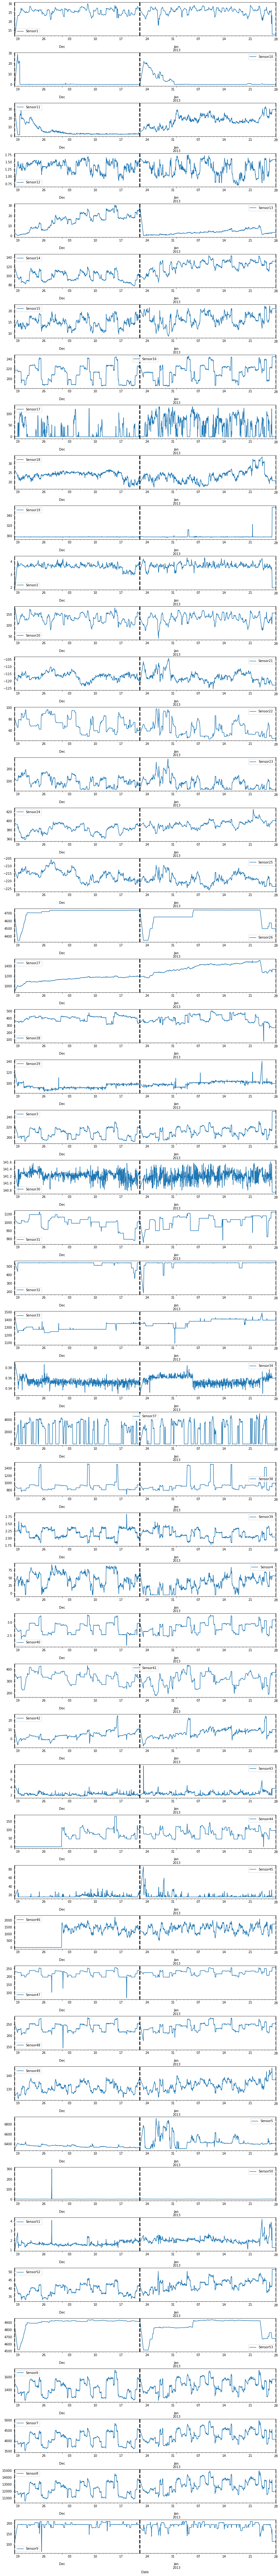

In [31]:
# Plot the hourly averaged time series
fig, ax = plt.subplots(len(hourly_averages.columns), sharex=False)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.5)
for i in range(0, len(hourly_averages.columns)):

        hourly_averages.plot(y=hourly_averages.columns[i], figsize=(15,150), ax=ax[i])
    
        # Draw ticked lines at the important timestamps
        hline0 = ax[i].axvline(x = change_times[0], linewidth=3, color='black',ls='--')
        hline1 = ax[i].axvline(x = change_times[1], linewidth=3, color='black',ls='--')
        hline2 = ax[i].axvline(x = change_times[2], linewidth=3, color='black',ls='--')
        hline3 = ax[i].axvline(x = change_times[3], linewidth=3, color='black',ls='--')
        hline4 = ax[i].axvline(x = change_times[4], linewidth=3, color='black',ls='--')
    
plt.savefig('plots/hourly_data.pdf')

In [32]:
# Create component lifetime data
# Component lifetime is 0 at the time the component have been changed.
idx = pd.period_range(min(hourly_averages.index), max(hourly_averages.index), freq='H')
new_component_changes = component_changes.reindex(idx, fill_value=0)
new_component_changes['lifetime'] = 0
del new_component_changes['installation_dttm']
del new_component_changes['supplier']
del new_component_changes['sub_machine']
del new_component_changes['component_id']

In [33]:
# Component lifetime then increases linearly with time
j = 0
for i in range(0,new_component_changes.size):
    a=new_component_changes.index[i]
    if any(a.strftime('%Y-%m-%d %H:%M:%S') == c for c in change_times):
        j = 0
    new_component_changes.at[a, 'lifetime'] = j
    j += 1

In [34]:
# Change to datetime indexing
new_component_changes.index.names = ['Date']
new_component_changes.index = new_component_changes.index.astype('datetime64[ns]') 

In [35]:
# Combine sensor measurements and component lifetime into same dataframe
combined_df = new_component_changes.combine_first(hourly_averages)

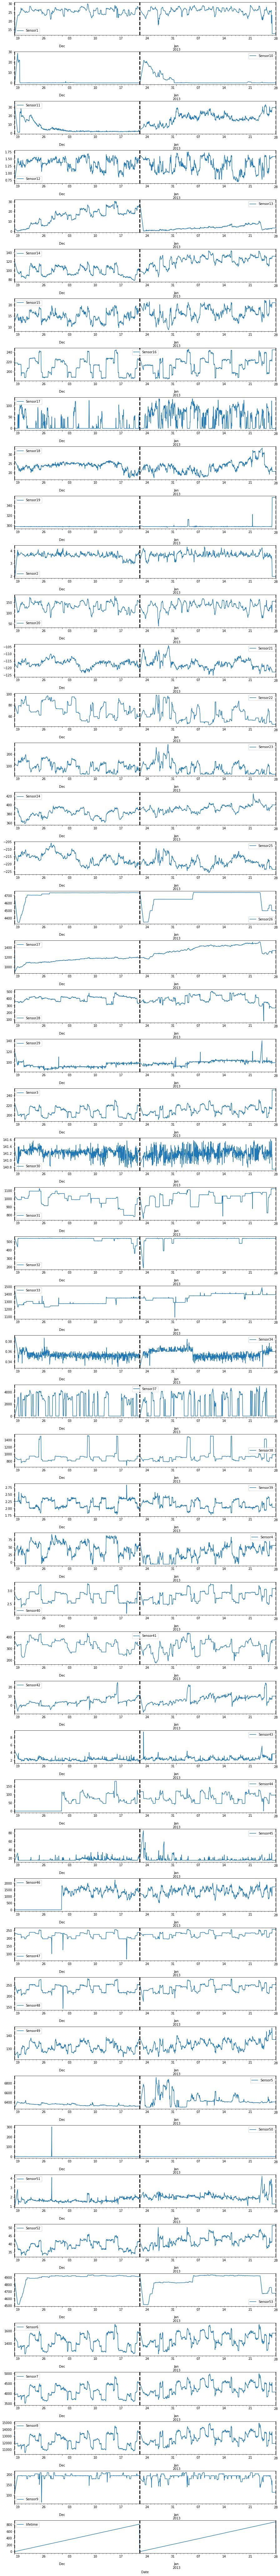

In [36]:
# Plot both sensor measurements and component lifetime in same plot
fig, ax = plt.subplots(len(combined_df.columns), sharex=False)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.5)
for i in range(0, len(combined_df.columns)):

        combined_df.plot(y=combined_df.columns[i], figsize=(15,150), ax=ax[i])
    
        # Draw ticked lines at the important timestamps
        hline0 = ax[i].axvline(x = change_times[0], linewidth=3, color='black',ls='--')
        hline1 = ax[i].axvline(x = change_times[1], linewidth=3, color='black',ls='--')
        hline2 = ax[i].axvline(x = change_times[2], linewidth=3, color='black',ls='--')
        hline3 = ax[i].axvline(x = change_times[3], linewidth=3, color='black',ls='--')
        hline4 = ax[i].axvline(x = change_times[4], linewidth=3, color='black',ls='--')
    
plt.savefig('plots/sensor_and_component_lifetime.pdf')

In [37]:
# Trends, seasonality and noise should be accounted for before identifying the sensor that best correlates with
# component lifetime.
# Let us use statsmodels seasonal decompose
# https://towardsdatascience.com/analyzing-time-series-data-in-pandas-be3887fdd621
# We decompose the sensor time series according to an additive model:
# y(t) = Level(t) + Trend(t) + Seasonality(t) + Noise(t)

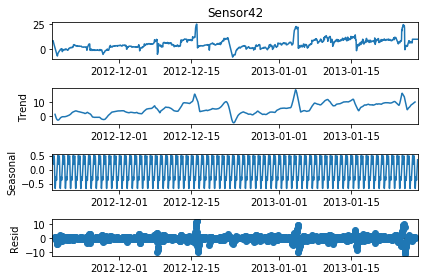

In [38]:
# An example seasonal decomposition of Sensor 42 (which we soon see correlates best with component lifetime)
decomposition = sm.tsa.seasonal_decompose(combined_df['Sensor42'], model='additive')
fig = decomposition.plot()

In [39]:
# Let us decompose each time series and calculate their correlation with component lifetime
for i in range(0, len(combined_df.columns)):
    decomposition = sm.tsa.seasonal_decompose(combined_df[combined_df.columns[i]], model='additive', extrapolate_trend='freq')
    r, p = stats.pearsonr(decomposition.trend, combined_df['lifetime'])
    print(combined_df.columns[i])
    print(f"Scipy computed Pearson r: {r} and p-value: {p}\n")

Sensor1
Scipy computed Pearson r: -0.1013075884092392 and p-value: 2.778806716934798e-05

Sensor10
Scipy computed Pearson r: -0.5319853878574423 and p-value: 3.387877325786847e-125

Sensor11
Scipy computed Pearson r: 0.10066355427432888 and p-value: 3.125883495388486e-05

Sensor12
Scipy computed Pearson r: -0.1622874441518275 and p-value: 1.5737220700183586e-11

Sensor13
Scipy computed Pearson r: 0.3672401508177652 and p-value: 1.4011521379365367e-55

Sensor14
Scipy computed Pearson r: 0.2486887087625379 and p-value: 1.8977012118417933e-25

Sensor15
Scipy computed Pearson r: 0.1908979656857121 and p-value: 1.866215526656729e-15

Sensor16
Scipy computed Pearson r: 0.12195879974350438 and p-value: 4.393842684178488e-07

Sensor17
Scipy computed Pearson r: -0.16350190181967594 and p-value: 1.1053933815528989e-11

Sensor18
Scipy computed Pearson r: 0.23635174442315857 and p-value: 4.4787661348410055e-23

Sensor19
Scipy computed Pearson r: 0.20654606293508906 and p-value: 6.967765211231042e-

In [40]:
# Now we know that measurements from Sensor 42 will be used as a response variable in our forecast model
# Let us save the processed data into a masterfile
combined_df.to_excel("data/masterfile.xlsx")